<a href="https://colab.research.google.com/github/AliBenovaa/IANNwTF_Group24/blob/main/Homework02Group24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def relu_function(x):
    return (np.maximum(0,x))

def relu_derivation(x):
    return 0 if x < 0 else 1


class Layer(object):
    """Implements a perceptron network"""
    def __init__(self,input_units):
        self.W = np.array(np.random.randn(input_units)) #constructs a weight matrix with random values
        self.b = np.zeros((1)) #constructs a bias with value zero
        self.input_units=input_units
        self.layer_input = None
        self.layer_preact = None
        self.layer_act = None
        self.learning_rate = 0.001 #sets the learning rate 



    def forward_step(self, inputs):
        """
        Single Layer Forward Propagation
        """
        self.inputs = inputs
        self.output = relu_function(np.sum(np.dot(self.W, inputs))+self.b)  #apply the relu_function to each of the unit's parameters
        return self.output



    def backward_step(self, delta):
        """
        Update all weights and bias with the one delta multiplied by the matching input/activation multiplied with the learning rate (alpha).
        :parameter delta is the value of the delta-rule
        """

        #Calculating the gradient and then updating the parameters
        self.W -= self.learning_rate * delta * self.inputs 
        self.b -= self.learning_rate * delta 
        


       

In [2]:
def calc_mean_accuracy(outputs, targets):
    if len(outputs) != len(targets):
        raise IndexError("Length of outputs does not match target length!")
    correct = 0
    for i, output in enumerate(outputs):
        if abs(output-targets[i]) < 0.5:
            correct += 1
    return float(correct)/float(len(outputs))

def calc_mean_loss(outputs, targets):
    if len(outputs) != len(targets):
        raise IndexError("Length of outputs does not match target length!")
    loss_sum = 0.0
    for i, output in enumerate(outputs):
        loss_sum += abs(output-targets[i])
    return float(loss_sum)/float(len(outputs))

In [3]:
import numpy as np

class MLP():
    def __init__(self, layers):
        """
        :param layers is an array, containing input, hidden and output layers. ([input, h1, ..., hn, output])
        It's length-2 is the number of hidden layers.
        The elements are the number of neurons on the respective layer.
        """
        # input layer is not really made up of perceptrons but instead only describes the input vector
        # still remember how many inputs there are
        self.input_number = layers[0]

        # initialize hidden layers
        hlayers = []
        for i in range(1, len(layers)-1):
            hlayers.append([])
            for j in range(layers[i]):
                hlayers[-1].append(Layer(layers[i-1]))
        self.hidden_layers = np.array(hlayers)

        # initialize output layer
        self.output_neurons = np.array([Layer(layers[-2]) for _ in range(layers[-1])])

        self.output = np.empty(layers[-1])


    def forward_step(self, input):
        """
        Calculate output of the MLP.
        :param input to the MLP
        """
        next_vals = input
        
        # loop through hidden layers to do the forward_step for each layer hl
        for hl in self.hidden_layers:
            vals = np.copy(next_vals)
            next_vals = np.array([p.forward_step(vals) for p in hl])
            
        next_vals=next_vals.flatten()
        # return output of output layer
        self.output = np.array([p.forward_step(next_vals) for p in self.output_neurons])
        return self.output

    def backprop_step(self, target):
        """
        Use loss function and backpropagation to change Perceptron weights.
        :param target is the expected output.
        """
        # calculate delta for every layer and call .update(delta)
        deltas = np.empty(len(self.output_neurons))
        
        # for output layer: delta = -(ti-yi)*relu'(diN)
        efunc = -1.0 * (target-self.output)
        for i, n_out in enumerate(self.output_neurons):
            deltas[i] = efunc[i] * relu_derivation(n_out.output)
            n_out.backward_step(deltas[i])

        # for other layers
        nextlayer = self.output_neurons
        nextsize = len(self.output_neurons)
        for l in range(len(self.hidden_layers)-1, -1, -1):
            nextdeltas = np.empty(len(self.hidden_layers[l]))
            # for each perceptron in this hidden layer
            for i in range(len(self.hidden_layers[l])):
                esum = 0
                for k in range(nextsize):
                    esum += deltas[k] * nextlayer[k].W[i]

                nextdeltas[i] = esum * relu_derivation(self.hidden_layers[l][i].output)
                self.hidden_layers[l][i].backward_step(nextdeltas[i])

            nextsize = len(self.hidden_layers[l])
            nextlayer = self.hidden_layers[l]

            deltas = nextdeltas.copy()






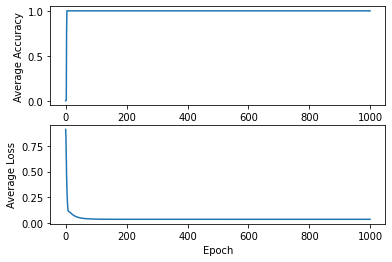

Doing one test:
Output for input 0.4319341932813665: [[0.93200326]]
Output for input 0.23427407534964595: [[0.95104711]]
Output for input 0.6480704786654603: [[0.9111793]]
Output for input 0.1239756747037094: [[0.96167396]]
Output for input 0.045737147527478705: [[0.96904541]]
Output for input 0.7093287599751554: [[0.90527728]]
Output for input 0.5525036825086314: [[0.92038682]]
Output for input 0.8776523798071523: [[0.8890599]]
Output for input 0.02310238834506939: [[0.96106682]]
Output for input 0.27345684109019963: [[0.94727199]]


In [5]:
"""
This is the main script for executing the self-implemented MLP on learning logical operations.
"""
import numpy as np
import matplotlib.pyplot as plt



"""
This is the main script for executing the self-implemented MLP on learning logical operations.
"""
#   Taks 1 Our data set
x = np.random.uniform(0,1,100)
t = np.empty(100)

for i in range(len(x)):
    targets = ((x[i] ** 3) - (x[i] ** 2 ))+1
    t[i] = targets



# create a MLP with 100 inputs, one hidden layers with 10 perceptrons each and one output neuron
mlp = MLP([1, 10, 1])

analysis = []


input = x
target = t

for i in range(1000): #for 1000 epochs
    outputs = []

    for j in range(100):
        outputs.append(mlp.forward_step(input[j]))
        mlp.backprop_step(target[j])
    
    # keep track of accuracy and loss for later visualization
    mean_accuracy = calc_mean_accuracy(outputs, target)
    mean_loss = calc_mean_loss(outputs, target)
    analysis.append([i, mean_accuracy, mean_loss])

analysis = np.array(analysis)
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(analysis[:,0], analysis[:,1])
ax1.set_ylabel("Average Accuracy")

ax2.plot(analysis[:,0], analysis[:,2])
ax2.set_ylabel("Average Loss")
ax2.set_xlabel("Epoch")

plt.show()

print("Doing one test:")
output = mlp.forward_step(input[0])
print(f"Output for input {input[0]}: {output}")
output = mlp.forward_step(input[1])
print(f"Output for input {input[1]}: {output}")
output = mlp.forward_step(input[2])
print(f"Output for input {input[2]}: {output}")
output = mlp.forward_step(input[3])
print(f"Output for input {input[3]}: {output}")
output = mlp.forward_step(input[4])
print(f"Output for input {input[4]}: {output}")
output = mlp.forward_step(input[5])
print(f"Output for input {input[5]}: {output}")
output = mlp.forward_step(input[6])
print(f"Output for input {input[6]}: {output}")
output = mlp.forward_step(input[7])
print(f"Output for input {input[7]}: {output}")
output = mlp.forward_step(input[8])
print(f"Output for input {input[8]}: {output}")
output = mlp.forward_step(input[9])
print(f"Output for input {input[9]}: {output}")